# lab1-1

1. 함수를 정의하고
2. uniform한 xy 분포를 만들어서
3. 함수값 y 보다 값이 작은 uniform(y)만 카운트해서 
4. 전체 비율을 구해서 근사값을 유추한다

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def my_function(x_value):
    return np.sin(x_value)


def monte_carlo_integral(my_func, start, end, points):
    random_x_points = []
    random_y_points = []
    #무작위 x, y를 리스트에 담음
    for i in range(points):
        random_x_points.append(np.random.uniform(start, end))
        random_y_points.append(np.random.uniform(0, my_func(end)))

    under_curve = 0
    #함수 아래에 있는 값들을 카운팅
    for i in range(points):
        if random_y_points[i] <= my_func(random_x_points[i]):
            under_curve += 1
    #전체 값 중 함수 아래에 있는 값을들 카운트
    ratio_under_curve = under_curve / points
    #끝 점과 시작점을 빼서 비율에 곱함
    estimated_area = ratio_under_curve * (end - start) * my_func(end)

    return estimated_area


def do(start_point, end_point, number_of_points):
    integral_result = monte_carlo_integral(my_function, start_point, end_point, number_of_points)

    print("Result of the Monte Carlo integration for f(x)=x^2 from", start_point, "to", end_point, "is",
          integral_result)

    x_vals_for_plotting = np.linspace(start_point, end_point, 500)
    y_vals_for_plotting = my_function(x_vals_for_plotting)

    plt.plot(x_vals_for_plotting, y_vals_for_plotting, label="f(x) = x^2")
    plt.fill_between(x_vals_for_plotting, y_vals_for_plotting, color="lightblue", alpha=0.3)

    random_x_points = []
    random_y_points = []
    for i in range(number_of_points):
        random_x_points.append(np.random.uniform(start_point, end_point))
        random_y_points.append(np.random.uniform(0, my_function(end_point)))

    plt.scatter(random_x_points, random_y_points, color="red", s=1, alpha=0.5, label="Random Points")

    plt.xlim(start_point, end_point)
    plt.ylim(0, my_function(end_point))
    plt.title("Monte Carlo Integration Approximation: " + str(integral_result))  # 제목 추가
    plt.legend()
    plt.show()


Result of the Monte Carlo integration for f(x)=x^2 from 0 to 2 is 1.3602429667120204


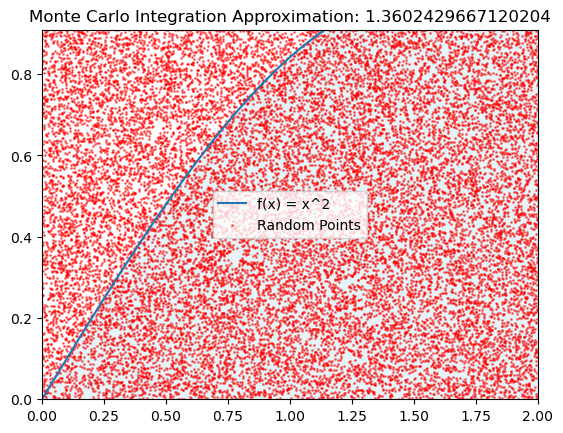

Result of the Monte Carlo integration for f(x)=x^2 from 0 to 2 is 1.366462616459422


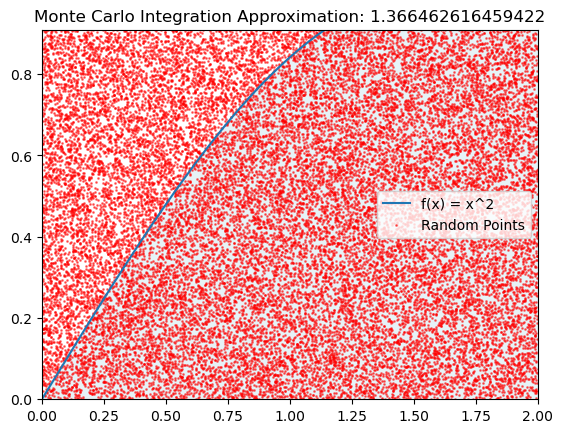

Result of the Monte Carlo integration for f(x)=x^2 from 0 to 2 is 1.368986800515714


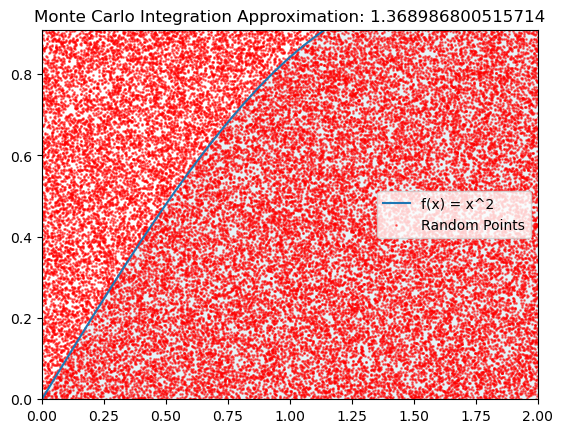

In [32]:
# 3번 반복함
for i in range(3):
    do(0, 2, np.random.randint(low = 1000, high = 100000))

# Lab 1-2

1. 뉴턴 랩슨 방식으로 근사값을 추정한다.
2. 즉, 추정값을 가지고 근사값을 찾아가는 과정이다.
3. 새로운 근사값은 y_(t-1) - f_(t) / f_(t-1)로 찾아간다. 
4. 해당 수식을 그대로 코드로 구현한다.


In [37]:
def find_cube_root_using_newton_method(number_to_find_cube_root_for, tolerance_value=1e-6, max_iterations_allowed=1000):
    """
    estimated_cube_root (float): 계산된 세제곱근 값
    total_iterations_done (int): 수행된 반복 횟수
    """
    
    # 초기 추정값 설정하기
    if number_to_find_cube_root_for != 0:
        initial_guess = number_to_find_cube_root_for / 3.0  # 초기 값으로 x / 3 설정
    else:
        return 0  # 0의 세제곱근은 0이므로 바로 반환
    
    # 반복문을 통해 뉴턴-랩슨 방법 적용
    for iteration_count in range(max_iterations_allowed):
        # 새로운 추정값 계산하기
        new_guess = initial_guess - (initial_guess**3 - number_to_find_cube_root_for) / (3 * initial_guess**2)
        
        # 추정값이 충분히 가까워졌는지 확인 
        if abs(new_guess - initial_guess) < tolerance_value:
            return new_guess, iteration_count + 1  # 세제곱근과 반복 횟수 반환
        
        # 이전 추정값을 새로운 값으로 업데이트
        initial_guess = new_guess  # 새로운 추정값을 다음 반복에서 사용
    
    # 최대 반복 횟수에 도달하면 최신 추정값 반환
    return initial_guess, max_iterations_allowed


In [38]:
# 테스트 숫자
numbers = [8, 27, 64, -27, 1000]

# 각 숫자에 대해 세제곱근을 구하고 결과 출력
for num in numbers:
    result, iterations = find_cube_root_using_newton_method(num)
    print(f"Number: {num}, Cube Root: {result:.6f}, Iterations: {iterations}")


Number: 8, Cube Root: 2.000000, Iterations: 5
Number: 27, Cube Root: 3.000000, Iterations: 7
Number: 64, Cube Root: 4.000000, Iterations: 9
Number: -27, Cube Root: -3.000000, Iterations: 7
Number: 1000, Cube Root: 10.000000, Iterations: 13
